In [1]:
import pandas as pd

#%pylab inline
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-bright')
rcParams['figure.figsize'] = [8.0, 6.0]
rcParams['figure.dpi'] = 80
my_dir = 'jupyter/'

In [3]:
directory = 'archive/'
prefix = 'olist_'
suffix = '_dataset.csv'

def olist_read(name, date_cols=None):
    if date_cols:
        return pd.read_csv(directory + prefix + name + suffix, parse_dates=date_cols)
    return pd.read_csv(directory + prefix + name + suffix)

customers = olist_read('customers')
geolocation = olist_read('geolocation')
order_items = olist_read('order_items')
order_reviews = olist_read('order_reviews', date_cols=[5, 6])
orders = olist_read('orders', date_cols=[3, 4, 5, 6, 7])
products = olist_read('products')
sellers = olist_read("sellers")
payments = olist_read("order_payments")
prod_cat_name = pd.read_csv(directory + 'product_category_name_translation.csv')
julie_prod_cat_name = pd.read_csv(directory + 'julie_product_category_name_translation.csv')

In [4]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
customer_id_to_unique_id = customers[['customer_id', 'customer_unique_id']].set_index('customer_id', drop=True)
unique_customers = customers.drop(columns='customer_id').groupby(by='customer_unique_id').agg(pd.Series.mode)

In [6]:
unique_customers

,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP
0000f46a3911fa3c0805444483337064,88115,sao jose,SC
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE
fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA
ffff371b4d645b6ecea244b27531430a,78552,sinop,MT


In [7]:
prod_cat_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [8]:
julie_prod_cat_name['julie_cat'].value_counts()

utilities_hobbies    18
home_everyday        14
body                 12
home_construction     8
art                   7
food_drink            5
professional          4
misc                  3
Name: julie_cat, dtype: int64

In [9]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [10]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [11]:
srce_col_name = 'customer_id'
dest_col_name = 'customer_unique_id'
dictionary = customers.set_index(srce_col_name, drop=True)[dest_col_name]
orders[dest_col_name] = orders[srce_col_name].map(dictionary, na_action='ignore')

In [12]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c


In [13]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [14]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15,2017-12-16 01:29:43


In [15]:
source_col_name = 'product_category_name'
dest_col_name = 'product_category_name_english'
dictionary = prod_cat_name.set_index(source_col_name, drop=True)[dest_col_name]
products[dest_col_name] = products[source_col_name].map(dictionary, na_action='ignore')

source_col_name = 'product_category_name'
dest_col_name = 'julie_cat'
dictionary = julie_prod_cat_name.set_index(source_col_name, drop=True)[dest_col_name]
products[dest_col_name] = products[source_col_name].map(dictionary, na_action='ignore')

In [16]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,julie_cat
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,body
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,utilities_hobbies
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,body
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,home_construction
...,...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor,home_everyday
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights,home_construction
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table,home_everyday
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,utilities_hobbies


In [17]:
agg_dict = {'price': 'sum', 'freight_value': 'sum', 'order_item_id': 'count', 'product_id': 'nunique'}
rename_dict = {'order_item_id': 'nb_items', 'product_id': 'nb_different_products'}
groupby_col = 'order_id'
keep = list(agg_dict.keys()) + [groupby_col]
orders_recap = order_items[keep].groupby(by=[groupby_col]).agg(agg_dict).rename(columns=rename_dict)
orders_recap

,price,freight_value,nb_items,nb_different_products
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1,1
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1,1
000229ec398224ef6ca0657da4fc703e,199.00,17.87,1,1
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1,1
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41,1,1
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,1,1
fffce4705a9662cd70adb13d4a31832d,99.90,16.95,1,1


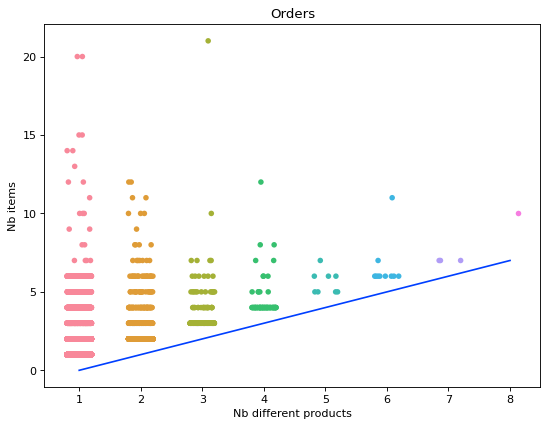

In [18]:
sns.stripplot(data=orders_recap, x='nb_different_products', y='nb_items', jitter=0.2)
plt.ylabel('Nb items')
plt.xlabel('Nb different products')
plt.title('Orders')
plt.plot(list(range(8)), list(range(8)))
plt.plot()
plt.show()

<AxesSubplot:xlabel='nb_different_products', ylabel='price'>

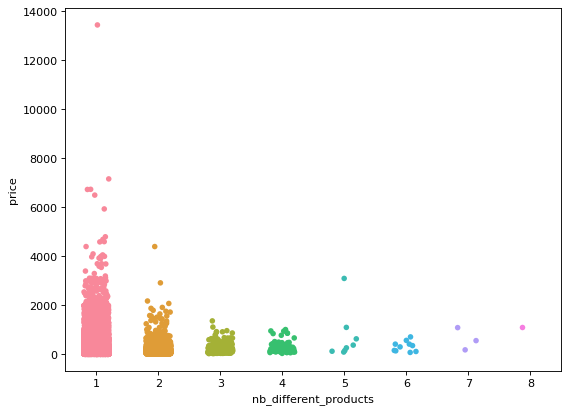

In [19]:
sns.stripplot(data=orders_recap, x='nb_different_products', y='price', jitter=0.2)

In [20]:
orders_recap[orders_recap['price'] > 10000]

,price,freight_value,nb_items,nb_different_products
order_id,,,,
03caa2c082116e1d31e67e9ae3700499,13440.0,224.08,8,1


In [21]:
order_items[order_items['order_id'] == '03caa2c082116e1d31e67e9ae3700499']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01


In [22]:
order_items[order_items['product_id'] == '5769ef0a239114ac3a854af00df129e4']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01


In [23]:
unique_items = order_items.drop_duplicates(subset=['price', 'freight_value', ])
# sns.stripplot(data=order_items, x='freight_value', y='price', jitter=0.2)

In [24]:
a = order_items.groupby(by=['product_id']).agg({
    'order_id': 'count',
    'price': 'mean',
    'freight_value': 'mean'
    }).reset_index().rename(columns={'order_id': 'ordered_count'})

In [25]:
a

,product_id,ordered_count,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65,18.590
1,00088930e925c41fd95ebfe695fd2655,1,129.90,13.930
2,0009406fd7479715e4bef61dd91f2462,1,229.00,13.100
3,000b8f95fcb9e0096488278317764d19,2,58.90,19.600
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00,19.270
...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2,114.99,27.705
32947,fff81cc3158d2725c0655ab9ba0f712c,1,90.00,7.890
32948,fff9553ac224cec9d15d49f5a263411f,1,32.00,11.850
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,33.99,11.774


Text(0.5, 1.0, 'Products price vs products freight values')

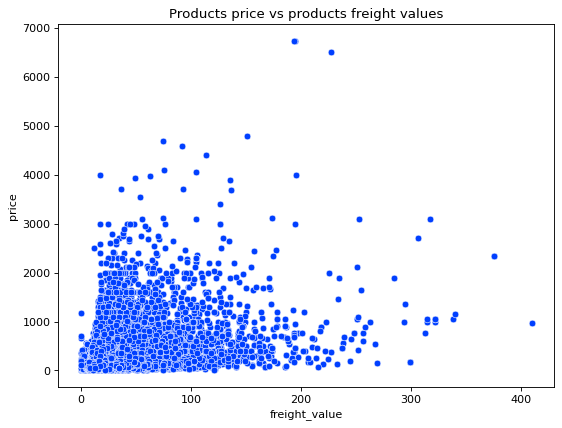

In [26]:
sns.scatterplot(data=order_items, x='freight_value', y='price')
plt.title('Products price vs products freight values')

In [27]:
orders_detailed = orders.merge(right=order_reviews, left_on='order_id', right_on='order_id', how='outer')
orders_detailed = orders_detailed.merge(right=orders_recap, left_on='order_id', right_on='order_id', how='outer')

In [28]:
orders_detailed

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,price,freight_value,nb_items,nb_different_products
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,29.99,8.72,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,118.70,22.76,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,159.90,19.22,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,45.00,27.20,1.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51,19.90,8.72,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22,2017-03-23 11:02:08,72.00,13.08,1.0,1.0
99996,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,174.90,20.10,1.0,1.0
99997,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,205.99,65.02,1.0,1.0
99998,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,359.98,81.18,2.0,1.0


In [29]:
orders_detailed.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  161
order_delivered_carrier_date      1793
order_delivered_customer_date     2987
order_estimated_delivery_date        0
customer_unique_id                   0
review_id                            0
review_score                         0
review_comment_title             88285
review_comment_message           58247
review_creation_date                 0
review_answer_timestamp              0
price                              778
freight_value                      778
nb_items                           778
nb_different_products              778
dtype: int64

In [30]:
orders_detailed[orders_detailed['price'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,price,freight_value,nb_items,nb_different_products
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,7fb04ba6e8b915c62557517d5c1e04ee,1,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,NaN,NaN,NaN,NaN
588,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,b6ea5566d6060db04ebe53a1291e4541,3,NaN,NaN,2018-02-18,2018-02-20 19:23:56,NaN,NaN,NaN,NaN
691,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,aaeb804fe1828db8cc3d8b52ec38a1fa,1,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,NaN,NaN,NaN,NaN
741,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,2349bbb558908e0955e98d47dacb7adb,519e62c42f33dce5b47ffddf9fde28df,1,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,NaN,NaN,NaN,NaN
1136,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,4fa4365000c7090fcb8cad5713c6d3db,9c0d840dfe562debfa52a1792bd64bff,1,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99811,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,a33e0969408919ba06779f497ead93ec,396e26da77b10734f3f8b5d5515fef4e,1,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA...",2018-02-09,2018-02-09 10:12:45,NaN,NaN,NaN,NaN
99842,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,e90598185d2427a35e32ef241a5c04aa,16d3db296c46b4411dfc5f8bde882e6d,5,NaN,NaN,2018-07-24,2018-07-25 16:26:05,NaN,NaN,NaN,NaN
99906,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,d05c44a138277ad325d915c6b7ccbcdf,047fd109ced39e02296f6aeb74f6a6f1,4,NaN,NaN,2018-07-31,2018-08-02 15:11:49,NaN,NaN,NaN,NaN
99907,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,e72a90a2b29fe1a8795b284aaaa3246f,41b9de18e0dd1e085e3c402d1c9b87d0,1,NaN,Fiz a compra do produto para presentear uma pe...,2017-09-20,2017-09-20 11:20:09,NaN,NaN,NaN,NaN


In [31]:
order_items[order_items['order_id'] == 'c272bcd21c287498b4883c7512019702']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [32]:
orders_detailed[orders_detailed['price'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,price,freight_value,nb_items,nb_different_products
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,7fb04ba6e8b915c62557517d5c1e04ee,1,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07,2017-12-11 10:37:57,NaN,NaN,NaN,NaN
588,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,b6ea5566d6060db04ebe53a1291e4541,3,NaN,NaN,2018-02-18,2018-02-20 19:23:56,NaN,NaN,NaN,NaN
691,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,aaeb804fe1828db8cc3d8b52ec38a1fa,1,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10,2017-09-12 17:00:15,NaN,NaN,NaN,NaN
741,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,2349bbb558908e0955e98d47dacb7adb,519e62c42f33dce5b47ffddf9fde28df,1,NaN,Não compre,2018-02-09,2018-02-09 03:22:43,NaN,NaN,NaN,NaN
1136,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,4fa4365000c7090fcb8cad5713c6d3db,9c0d840dfe562debfa52a1792bd64bff,1,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99811,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,a33e0969408919ba06779f497ead93ec,396e26da77b10734f3f8b5d5515fef4e,1,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA...",2018-02-09,2018-02-09 10:12:45,NaN,NaN,NaN,NaN
99842,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,e90598185d2427a35e32ef241a5c04aa,16d3db296c46b4411dfc5f8bde882e6d,5,NaN,NaN,2018-07-24,2018-07-25 16:26:05,NaN,NaN,NaN,NaN
99906,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,d05c44a138277ad325d915c6b7ccbcdf,047fd109ced39e02296f6aeb74f6a6f1,4,NaN,NaN,2018-07-31,2018-08-02 15:11:49,NaN,NaN,NaN,NaN
99907,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,e72a90a2b29fe1a8795b284aaaa3246f,41b9de18e0dd1e085e3c402d1c9b87d0,1,NaN,Fiz a compra do produto para presentear uma pe...,2017-09-20,2017-09-20 11:20:09,NaN,NaN,NaN,NaN


In [33]:
set(orders_detailed[orders_detailed['price'].isnull()]['order_status'])

{'canceled', 'created', 'invoiced', 'shipped', 'unavailable'}

Some order details (items ordered) are missing even for shipped orders.
Let's keep their customer_unique_id to remove them before saving

In [34]:
invalid_customers = set(list(orders_detailed[orders_detailed['price'].isnull()]['customer_unique_id']))

In [35]:
customer_orders = orders_detailed.groupby('customer_unique_id').agg({
    'price': ['sum', 'min', 'max'],
    'order_id': 'count',
    'nb_items': ['sum', 'mean', 'min', 'max']
})

In [36]:
customer_orders

price                   order_id nb_items  \
                                      sum      min      max    count      sum   
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2   129.90   129.90   129.90        1      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f    18.90    18.90    18.90        1      1.0   
0000f46a3911fa3c0805444483337064    69.00    69.00    69.00        1      1.0   
0000f6ccb0745a6a4b88665a16c9f078    25.99    25.99    25.99        1      1.0   
0004aac84e0df4da2b147fca70cf8255   180.00   180.00   180.00        1      1.0   
...                                   ...      ...      ...      ...      ...   
fffcf5a5ff07b0908bd4e2dbc735a684  1570.00  1570.00  1570.00        1      2.0   
fffea47cd6d3cc0a88bd621562a9d061    64.89    64.89    64.89        1      1.0   
ffff371b4d645b6ecea244b27531430a    89.90    89.90    89.90        1      1.0   
ffff5962728ec6157033ef9805bacc48   115.00   115.00   115.00        1      1.0   
ffffd2657e2aad2907e67c3e9daecbeb    56.99    56.99    56.99        1      1.0   

                                                 
                                 mean  min  max  
customer_unique_id                               
0000366f3b9a7992bf8c76cfdf3221e2  1.0  1.0  1.0  
0000b849f77a49e4a4ce2b2a4ca5be3f  1.0  1.0  1.0  
0000f46a3911fa3c0805444483337064  1.0  1.0  1.0  
0000f6ccb0745a6a4b88665a16c9f078  1.0  1.0  1.0  
0004aac84e0df4da2b147fca70cf8255  1.0  1.0  1.0  
...                               ...  ...  ...  
fffcf5a5ff07b0908bd4e2dbc735a684  2.0  2.0  2.0  
fffea47cd6d3cc0a88bd621562a9d061  1.0  1.0  1.0  
ffff371b4d645b6ecea244b27531430a  1.0  1.0  1.0  
ffff5962728ec6157033ef9805bacc48  1.0  1.0  1.0  
ffffd2657e2aad2907e67c3e9daecbeb  1.0  1.0  1.0  

[96096 rows x 8 columns]

In [37]:
customer_orders[(customer_orders[('order_id', 'count')] > 1)].sort_values(by=('order_id', 'count'), ascending=False)

price                 order_id nb_items  \
                                      sum     min     max    count      sum   
customer_unique_id                                                            
8d50f5eadf50201ccdcedfb9e2ac8455   729.62   13.99  149.90       17     16.0   
3e43e6105506432c953e165fb2acf44c  1000.85   50.00  336.90        9     14.0   
1b6c7548a2a1f9037c1fd3ddfed95f33   809.21   34.23  236.00        7      9.0   
47c1a3033b8b77b3ab6e109eb4d5fdf3   874.60   38.00  378.00        7      8.0   
ca77025e7201e3b30c44b472ff346268   806.61   43.96  269.90        7     12.0   
...                                   ...     ...     ...      ...      ...   
5d63628c95182301765aa1482b0293aa   238.80   59.90  178.90        2      2.0   
5d7ebc17bf6d80838b3b42da27e0a5f7    64.99   64.99   64.99        2      1.0   
5d7ff357d021646cf8adf2601713f624   198.00   99.00   99.00        2      2.0   
5d8f5f50fd2c7fbe8b335d945105a37f   509.70  169.90  339.80        2      3.0   
ffe254cc039740e17dd15a5305035928    51.08   13.90   37.18        2      2.0   

                                                      
                                      mean  min  max  
customer_unique_id                                    
8d50f5eadf50201ccdcedfb9e2ac8455  1.000000  1.0  1.0  
3e43e6105506432c953e165fb2acf44c  1.555556  1.0  4.0  
1b6c7548a2a1f9037c1fd3ddfed95f33  1.285714  1.0  2.0  
47c1a3033b8b77b3ab6e109eb4d5fdf3  1.142857  1.0  2.0  
ca77025e7201e3b30c44b472ff346268  1.714286  1.0  4.0  
...                                    ...  ...  ...  
5d63628c95182301765aa1482b0293aa  1.000000  1.0  1.0  
5d7ebc17bf6d80838b3b42da27e0a5f7  1.000000  1.0  1.0  
5d7ff357d021646cf8adf2601713f624  1.000000  1.0  1.0  
5d8f5f50fd2c7fbe8b335d945105a37f  1.500000  1.0  2.0  
ffe254cc039740e17dd15a5305035928  1.000000  1.0  1.0  

[3081 rows x 8 columns]

In [38]:
len(set(products['product_id'])), len(products)

(32951, 32951)

### Features Todo :

from products :
weight bought / volume bought

from orders :
delivery time / last delivery

from order_items w category :
nb items bought / price bought

from reviews :
count / best / worst

In [39]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [40]:
col = 'order_purchase_timestamp'
min(orders[col]), max(orders[col]), max(orders[col]) - min(orders[col])

(Timestamp('2016-09-04 21:15:19'),
 Timestamp('2018-10-17 17:30:18'),
 Timedelta('772 days 20:14:59'))

Orders logged from 2016-09-04 to 2018-10-17 (about 2 years)

In [41]:
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp']

In [42]:
prod_cat_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [43]:
srce_col_name = 'product_id'
dest_col_name = 'julie_cat'
dictionary = products.set_index(srce_col_name, drop=True)[dest_col_name]
order_items[dest_col_name] = order_items[srce_col_name].map(dictionary, na_action='ignore')

srce_col_name = 'order_id'
dest_col_name = 'customer_unique_id'
dictionary = orders.set_index(srce_col_name, drop=True)[dest_col_name]
order_items[dest_col_name] = order_items[srce_col_name].map(dictionary, na_action='ignore')

In [44]:
customer_items = order_items.groupby(by=['customer_unique_id', 'julie_cat']).agg({
    'price': 'sum',
    'freight_value': 'sum',
    'order_item_id': 'count'
}).unstack().fillna(0).rename(columns={'order_item_id': 'items_count'})

In [45]:
customer_items.columns = customer_items.columns.to_flat_index()
customer_items.columns = [a + '_' + b for (a,b) in customer_items.columns]
customer_items

,price_art,price_body,price_food_drink,price_home_construction,price_home_everyday,price_misc,price_professional,price_utilities_hobbies,freight_value_art,freight_value_body,...,freight_value_professional,freight_value_utilities_hobbies,items_count_art,items_count_body,items_count_food_drink,items_count_home_construction,items_count_home_everyday,items_count_misc,items_count_professional,items_count_utilities_hobbies
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.00,0.0,0.0,129.9,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,18.90,0.0,0.0,0.0,0.0,0.0,0.00,0.0,8.29,...,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.00,0.0,0.0,0.0,0.0,0.0,69.00,0.0,0.00,...,0.0,17.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.00,0.0,0.0,0.0,0.0,0.0,25.99,0.0,0.00,...,0.0,17.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.00,0.0,0.0,0.0,0.0,0.0,180.00,0.0,0.00,...,0.0,16.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,1570.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,497.42,...,0.0,0.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,64.89,0.0,0.0,0.0,0.0,0.0,0.00,0.0,19.69,...,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.00,0.0,0.0,0.0,89.9,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
unique_customers = unique_customers.merge(right=customer_items, left_on='customer_unique_id', right_on='customer_unique_id', how='outer')

In [47]:
unique_customers

,customer_zip_code_prefix,customer_city,customer_state,price_art,price_body,price_food_drink,price_home_construction,price_home_everyday,price_misc,price_professional,...,freight_value_professional,freight_value_utilities_hobbies,items_count_art,items_count_body,items_count_food_drink,items_count_home_construction,items_count_home_everyday,items_count_misc,items_count_professional,items_count_utilities_hobbies
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,0.0,0.00,0.0,0.0,129.9,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,0.0,18.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,17.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,17.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,16.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,0.0,1570.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,0.0,64.89,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,0.0,0.00,0.0,0.0,0.0,89.9,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
customer_reviews = orders_detailed.sort_values(by='review_creation_date', ascending=True).groupby(by='customer_unique_id').agg({
    'review_score': ['min', 'max', 'last', 'count']
})
customer_reviews.columns = customer_reviews.columns.to_flat_index()
customer_reviews.columns = [a + '_' + b for (a,b) in customer_reviews.columns]

In [49]:
customer_reviews

,review_score_min,review_score_max,review_score_last,review_score_count
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5,5,5,1
0000b849f77a49e4a4ce2b2a4ca5be3f,4,4,4,1
0000f46a3911fa3c0805444483337064,3,3,3,1
0000f6ccb0745a6a4b88665a16c9f078,4,4,4,1
0004aac84e0df4da2b147fca70cf8255,5,5,5,1
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5,5,5,1
fffea47cd6d3cc0a88bd621562a9d061,4,4,4,1
ffff371b4d645b6ecea244b27531430a,5,5,5,1


In [50]:
unique_customers = unique_customers.merge(right=customer_reviews, left_index=True, right_on='customer_unique_id', how='outer')
unique_customers

,customer_zip_code_prefix,customer_city,customer_state,price_art,price_body,price_food_drink,price_home_construction,price_home_everyday,price_misc,price_professional,...,items_count_food_drink,items_count_home_construction,items_count_home_everyday,items_count_misc,items_count_professional,items_count_utilities_hobbies,review_score_min,review_score_max,review_score_last,review_score_count
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,0.0,0.00,0.0,0.0,129.9,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,5,5,5,1
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,0.0,18.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,4,4,1
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,3,3,1
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4,4,4,1
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,0.0,1570.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,5,5,1
fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,0.0,64.89,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,4,4,1
ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,0.0,0.00,0.0,0.0,0.0,89.9,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,5,5,5,1


In [51]:
orders['order_to_door_duration'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

In [52]:
customer_delivery_duration = orders.groupby(by='customer_unique_id').agg({
    'order_to_door_duration': ['min', 'max'],
    'order_delivered_customer_date' : 'max'
})
customer_delivery_duration.columns = customer_delivery_duration.columns.to_flat_index()
customer_delivery_duration.columns = [a + '_' + b for (a,b) in customer_delivery_duration.columns]
unique_customers = unique_customers.merge(right=customer_delivery_duration, left_index=True, right_on='customer_unique_id', how='outer')

In [53]:
unique_customers

,customer_zip_code_prefix,customer_city,customer_state,price_art,price_body,price_food_drink,price_home_construction,price_home_everyday,price_misc,price_professional,...,items_count_misc,items_count_professional,items_count_utilities_hobbies,review_score_min,review_score_max,review_score_last,review_score_count,order_to_door_duration_min,order_to_door_duration_max,order_delivered_customer_date_max
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,0.0,0.00,0.0,0.0,129.9,0.0,0.0,...,0.0,0.0,0.0,5,5,5,1,6 days 09:52:10,6 days 09:52:10,2018-05-16 20:48:37
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,0.0,18.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4,4,4,1,3 days 06:51:15,3 days 06:51:15,2018-05-10 18:02:42
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3,3,3,1,25 days 17:33:44,25 days 17:33:44,2017-04-05 14:38:47
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4,4,4,1,20 days 00:53:24,20 days 00:53:24,2017-11-01 21:23:05
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,5,5,5,1,13 days 03:23:14,13 days 03:23:14,2017-11-27 23:08:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,0.0,1570.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5,5,5,1,27 days 12:21:24,27 days 12:21:24,2017-07-06 09:22:00
fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,0.0,64.89,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4,4,4,1,30 days 02:20:24,30 days 02:20:24,2018-01-09 22:28:20
ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,0.0,0.00,0.0,0.0,0.0,89.9,0.0,...,1.0,0.0,0.0,5,5,5,1,14 days 20:55:48,14 days 20:55:48,2017-02-22 12:45:04


In [54]:
nb_distinct_items = order_items.groupby(by='customer_unique_id').agg({'product_id': pd.Series.nunique})
print('Nb distinct items per order')
print(nb_distinct_items['product_id'].value_counts())
nb_distinct_items = nb_distinct_items.rename(columns={'product_id':'nb_unique_items'})
unique_customers = unique_customers.merge(right=nb_distinct_items, left_index=True, right_on='customer_unique_id', how='outer')

Nb distinct items per order
1     89964
2      4683
3       559
4       152
5        32
6        17
7         8
9         2
13        1
15        1
8         1
Name: product_id, dtype: int64


In [55]:
nb_orders_per_customer = orders.groupby(by='customer_unique_id').agg({'order_id': pd.Series.nunique})
print('Nb orders per customer')
print(nb_orders_per_customer['order_id'].value_counts())
nb_orders_per_customer = nb_orders_per_customer.rename(columns={'order_id':'nb_orders'})
unique_customers = unique_customers.merge(right=nb_orders_per_customer, left_index=True, right_on='customer_unique_id', how='outer')

Nb orders per customer
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: order_id, dtype: int64


In [56]:
orders['order_status'].value_counts()
dict_status = {'delivered': 'fulfilled',
               'shipped': 'ongoing',
               'canceled': 'aborted',
               'unavailable': 'aborted',
               'invoiced': 'ongoing',
               'processing': 'ongoing',
               'created': 'ongoing',
               'approved': 'ongoing'}
orders['status'] = orders['order_status'].map(dict_status)

In [57]:
status_dummies = pd.get_dummies(orders['order_status'].map(dict_status), prefix='status')
orders = orders.merge(right=status_dummies, left_index=True, right_index=True)

orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_to_door_duration,status,status_aborted,status_fulfilled,status_ongoing
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,8 days 10:28:40,fulfilled,0,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,13 days 18:46:08,fulfilled,0,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,9 days 09:27:40,fulfilled,0,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,13 days 05:00:36,fulfilled,0,1,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,2 days 20:58:23,fulfilled,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,8 days 05:13:56,fulfilled,0,1,0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,22 days 04:38:58,fulfilled,0,1,0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,24 days 20:37:34,fulfilled,0,1,0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,17 days 02:04:27,fulfilled,0,1,0


In [58]:
customer_orders_status = orders.groupby(by='customer_unique_id').agg(sum)[['status_aborted', 'status_fulfilled', 'status_ongoing']]
unique_customers = unique_customers.merge(right=customer_orders_status, left_index=True, right_index=True)

In [59]:
orders['ordered_weekday'] = (orders['order_purchase_timestamp'].dt.dayofweek <= 4).astype(int)
orders['ordered_weekend'] = (orders['order_purchase_timestamp'].dt.dayofweek >= 5).astype(int)

In [60]:
orders['order_purchase_timestamp'].dt.hour.value_counts()

16    6675
11    6578
14    6569
13    6518
15    6454
21    6217
20    6193
10    6177
17    6150
12    5995
19    5982
22    5816
18    5769
9     4785
23    4123
8     2967
0     2394
7     1231
1     1170
2      510
6      502
3      272
4      206
5      188
Name: order_purchase_timestamp, dtype: int64

In [61]:
def map_hour(h):
    if h <= 9:
        return 'early'
    if h < 12:
        return 'morning'
    if h <= 14:
        return 'lunch'
    if h <= 17:
        return 'afternoon'
    if h <= 20:
        return 'evening'
    return 'night'

In [62]:
order_time_category = orders['order_purchase_timestamp'].dt.hour.apply(map_hour)
order_time_category.value_counts()

afternoon    19279
lunch        19082
evening      17944
night        16156
early        14225
morning      12755
Name: order_purchase_timestamp, dtype: int64

In [63]:
orders = orders.merge(right=pd.get_dummies(order_time_category, prefix='ordered'), left_index=True, right_index=True)

In [64]:
unique_customers = unique_customers.merge(right=orders.groupby(by='customer_unique_id').agg(sum), left_index=True, right_index=True)

In [65]:
unique_customers

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,price_art,price_body,price_food_drink,price_home_construction,price_home_everyday,price_misc,...,status_fulfilled_y,status_ongoing_y,ordered_weekday,ordered_weekend,ordered_afternoon,ordered_early,ordered_evening,ordered_lunch,ordered_morning,ordered_night
0000366f3b9a7992bf8c76cfdf3221e2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,0.0,0.00,0.0,0.0,129.9,0.0,...,1,0,1,0,0,0,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,0.0,18.90,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0
0000f46a3911fa3c0805444483337064,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
0000f6ccb0745a6a4b88665a16c9f078,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,0.0,1570.00,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
fffea47cd6d3cc0a88bd621562a9d061,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,0.0,64.89,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0
ffff371b4d645b6ecea244b27531430a,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,0.0,0.00,0.0,0.0,0.0,89.9,...,1,0,1,0,1,0,0,0,0,0
ffff5962728ec6157033ef9805bacc48,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,0.0,115.00,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,0


In [66]:
order_id_to_unique_id = orders.set_index('order_id', drop=True)['customer_id'].map(customer_id_to_unique_id['customer_unique_id'])

In [67]:
payment_info = payments.groupby(by=['order_id', 'payment_type']).agg(sum)
payment_info = payment_info.reset_index().set_index('order_id', drop=True)
payment_info.index = payment_info.index.map(order_id_to_unique_id).rename('customer_unique_id')
payment_info = payment_info.reset_index().groupby(by=['customer_unique_id', 'payment_type']).agg(sum)['payment_value'].unstack()
payment_info.columns = payment_info.columns.to_flat_index()
payment_info = payment_info.fillna(0)
payment_info['total_amount'] = payment_info.sum(axis=1)

In [68]:
unique_customers = unique_customers.merge(right=payment_info, left_index=True, right_index=True, how='outer')

In [69]:
zip_to_coord = geolocation.groupby(by='geolocation_zip_code_prefix').agg('mean')
customers['latitude'] = customers['customer_zip_code_prefix'].map(zip_to_coord['geolocation_lat'])
customers['longitude'] = customers['customer_zip_code_prefix'].map(zip_to_coord['geolocation_lng'])

In [70]:
customer_location = customers.groupby(by='customer_unique_id').agg({'latitude': 'last', 'longitude': 'last'})
unique_customers = unique_customers.merge(right=customer_location, left_index=True, right_index=True, how='outer')

In [71]:
order_frequency = orders.groupby(by='customer_unique_id').agg({'order_purchase_timestamp': ['min', 'max'], 'order_status': 'count'})
order_frequency.columns = order_frequency.columns.to_flat_index()
order_frequency.columns = [a + '_' + b for (a,b) in order_frequency.columns]

In [72]:
order_frequency['bool_several_orders'] = 1*(order_frequency['order_status_count'] > 1)
order_frequency['order_frequency_days'] = ((order_frequency['order_purchase_timestamp_max'] - order_frequency['order_purchase_timestamp_min'])/order_frequency['order_status_count']).dt.days
latest_order = orders['order_purchase_timestamp'].max()
order_frequency['days_since_last_order'] = (latest_order - order_frequency['order_purchase_timestamp_max']).dt.days

In [73]:
order_frequency = order_frequency[['bool_several_orders', 'order_frequency_days', 'days_since_last_order']]
unique_customers = unique_customers.merge(right=order_frequency, left_index=True, right_index=True, how='outer')

In [74]:
unique_customers.drop(columns=['customer_unique_id'], errors='ignore', inplace=True)
unique_customers = unique_customers[unique_customers['customer_unique_id'].isin(invalid_customers) == False]
non_numeric_columns = ['customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_delivered_customer_date_max']
unique_customers_numeric = unique_customers.drop(columns=non_numeric_columns)

KeyError: 'customer_unique_id'

In [ ]:
if unique_customers_numeric['order_to_door_duration_min'].dtype != 'float':
    unique_customers_numeric['order_to_door_duration_min'] = unique_customers_numeric['order_to_door_duration_min'].apply(
        lambda x: x.days
    )

if unique_customers_numeric['order_to_door_duration_max'].dtype != 'float':
    unique_customers_numeric['order_to_door_duration_max'] = unique_customers_numeric['order_to_door_duration_max'].apply(
        lambda x: x.days
    )
unique_customers_numeric = unique_customers_numeric.fillna(0)
unique_customers_numeric.drop(columns=['kmeans_group'], errors='ignore', inplace=True)

In [ ]:
unique_customers_numeric.info()

In [ ]:
import pickle
pickle.dump(unique_customers_numeric, open(my_dir + 'unique_customers_numeric', 'wb'))
pickle.dump(unique_customers, open(my_dir + 'jupyter/unique_customers', 'wb'))

In [ ]:
unique_customers_numeric.columns